# Project for Friday 10/23 (due date Nov 4)

## Text analysis

This project is additional practice for 

1. Reading data from files.
2. Using appropriate data structures to store your data.
3. Manipulating data, here useful tools cand be found in methods for strings (https://docs.python.org/3.8/library/stdtypes.html#string-methods)
and the string library (https://docs.python.org/3.8/library/string.html)
4. Using matplotlib to create figures.


Execute and/or answer the following tasks/questions:
1. Download *Moby Dick* (http://www.gutenberg.org/files/2701/2701-0.txt) and store the text in appropriate data structure(s) (Hint: dictionary).
1. How many characters does the text contain?
1. How many words does the text contain?
1. Which is the most common word in the text?
1. How many words appear exactly once?
1. Create a plot of the letter frequency (a,...,z). 
1. (Optional) Repeat the analysis for a  text in a different language (suggested: Don Quijote http://www.gutenberg.org/cache/epub/2000/pg2000.txt) Can you distinguish the languages using your letter frequency plots?


In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import requests 
import string
import re 

# removing apostrophe from punctuation list 
# to prevent word modification e.g. don't = dont
string.punctuation.replace("'", "")


'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# Accessing online text 
url = 'http://www.gutenberg.org/files/2701/2701-0.txt'
r = requests.get(url) 
r.encoding = 'utf-8'

# Acquiring text and storing it in a variable 
# with modifications (all lower case) 
start = r.text.find('MOBY-DICK')
end = r.text.find('End of Project Gutenberg')
text = r.text[start:end].lower()
regex = re.compile('[%s]' % re.escape(string.punctuation))
stripped = regex.sub(' ', text)

# Creation of dictionaries to store data 
words = {}
letters = {} 

for word in stripped.split(): 
    while len(word) > 0 and not word[-1].isalnum():
        word = word[:-1]
    while len(word) > 0 and not word[0].isalnum():
        word = word[1:]
    if word in words: 
        words[word] += 1
    else: 
        words[word] = 1 
    for letter in word: 
        if letter.isalpha(): 
            if letter in letters: 
                letters[letter] += 1
            else: 
                letters[letter] = 1 

# Counting words and letters 
lettercount = 0
wordcount = 0 
for letter in letters: 
    lettercount += letters[letter]
for word in words: 
    wordcount += words[word]

# Max count 
maximum = max(words, key = lambda key: words[key])
maxcount = words[maximum]

# Unique words 
ucount = 0 
for word in words: 
    if words[word] == 1: 
        ucount += 1
    else: 
        pass 


### Answering Questions


In [39]:
print(f"The text contains {lettercount} characters.")
print(f"The text contains {wordcount} words.")
print(f"The most common word is '{maximum}' with {maxcount} appearance.")
print(f"There are {ucount} unique words that appeared exactly once.")

The text contains 955196 characters.
The text contains 217527 words.
The most common word is 'the' with 14461 appearance.
There are 8701 unique words that appeared exactly once.


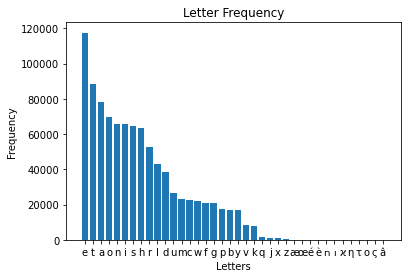

In [51]:
list = []
for letter in letters: 
    list.append([letter,letters[letter]])
list.sort(key = lambda x: x[1], reverse = True)
l,lf = zip(*list)
plt.bar(l,lf)
plt.title('Letter Frequency')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.show()